In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, mean_squared_error, roc_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
import math
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df = pd.read_csv("google-cluster-data-1.csv", sep=' ')

In [3]:
df = df.iloc[: , :-1]
df

,Time,ParentID,TaskID,JobType,NrmlTaskCores,NrmlTaskMem
0,90000,757745334,1488529826,0,0.000000,0.031130
1,90000,975992247,1488529821,0,0.000000,0.000000
2,90000,1468458091,1488529832,1,0.021875,0.002353
3,90000,1460281235,1488529840,0,0.000000,0.000000
4,90000,1164728954,1488529835,0,0.003125,0.001638
...,...,...,...,...,...,...
3535024,112500,1487094655,1487103476,0,0.000000,0.000879
3535025,112500,1461321601,1465612301,0,0.000000,0.000879
3535026,112500,1487094655,1487097223,0,0.000000,0.000879
3535027,112500,618817162,1485932004,1,0.000000,0.000879


In [4]:
#there are 4 types of jobs in the dataset
Jobtype0 = df[df["JobType"] == 0]
Jobtype0 = Jobtype0.drop(columns=["JobType", "ParentID"])
Jobtype1 = df[df["JobType"] == 1]
Jobtype1 = Jobtype1.drop(columns=["JobType", "ParentID"])
Jobtype2 = df[df["JobType"] == 2]
Jobtype2 = Jobtype2.drop(columns=["JobType", "ParentID"])
Jobtype3 = df[df["JobType"] == 3]
Jobtype3 = Jobtype3.drop(columns=["JobType", "ParentID"])

In [5]:
#jobtype 0 length 1653313, jobtype 1 length 1061088, jobtype 2 length 363597, jobtype 3 length 457031
len(df)

3535029

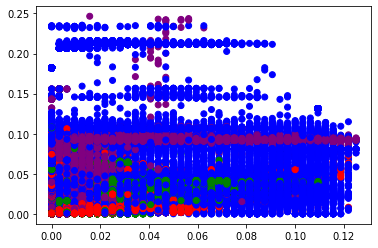

In [6]:
#plotting the jobtypes according to their cpu and mem usage
Cpuusage = df["NrmlTaskCores"]
Memusage = df["NrmlTaskMem"]
Jobtype = df["JobType"]
colors = ['red','green','blue','purple']
plt.scatter(Cpuusage, Memusage, c=Jobtype, cmap=matplotlib.colors.ListedColormap(colors))

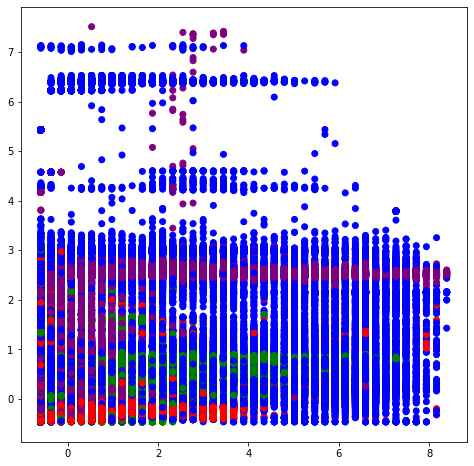

In [7]:
Cpuusage = df["NrmlTaskCores"]
Memusage = df["NrmlTaskMem"]
Jobtype = df["JobType"]
colors = ['red','green','blue','purple']
normalized_Cpuusage = (Cpuusage-Cpuusage.mean())/Cpuusage.std()
normalized_Memusage = (Memusage-Memusage.mean())/Memusage.std()
plt.figure(figsize=(8,8))
plt.scatter(normalized_Cpuusage, normalized_Memusage, c=Jobtype, cmap=matplotlib.colors.ListedColormap(colors))

# Select the first 0.4J JobTypes of each JobType J as Training set and the rest as validation set (0.3J) and testing set (0.3J).

In [8]:
train0 = df[df["JobType"]==0].head((int)(len(df[df["JobType"]==0])*.4));
train1 = df[df["JobType"]==1].head((int)(len(df[df["JobType"]==1])*.4));
train2 = df[df["JobType"]==2].head((int)(len(df[df["JobType"]==2])*.4));
train3 = df[df["JobType"]==3].head((int)(len(df[df["JobType"]==3])*.4));
train = train0.append(train1)
train = train.append(train2)
train = train.append(train3)

xtrain = train[["NrmlTaskCores", "NrmlTaskMem"]]
ytrain = train["JobType"]

In [9]:
test0 = df[df["JobType"]==0].iloc[(int)(len(df[df["JobType"]==0])*.4):];
test1 = df[df["JobType"]==1].iloc[(int)(len(df[df["JobType"]==1])*.4):];
test2 = df[df["JobType"]==2].iloc[(int)(len(df[df["JobType"]==2])*.4):];
test3 = df[df["JobType"]==3].iloc[(int)(len(df[df["JobType"]==3])*.4):];

test = test0.append(test1)
test = test.append(test2)
test = test.append(test3)

validation = test.iloc[:, :(int)(len(test)/2)]
test = test.iloc[:(int)(len(test)/2), :]

In [10]:
xvalidation = validation[["NrmlTaskCores", "NrmlTaskMem"]]
yvalidation = validation["JobType"]

xtest = test[["NrmlTaskCores", "NrmlTaskMem"]]
ytest = test["JobType"]

# Multinomial Logistic Regression Model

In [11]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(xtrain, ytrain);

In [12]:
train_pred = model.predict(xtrain)
validation_pred = model.predict(xvalidation)
test_pred = model.predict(xtest)

In [13]:
precision, recall, fscore, support = precision_recall_fscore_support(ytrain, train_pred)
print("Training Precision: "+ (str)(precision[0]))
print("Training Recall: "+ (str)(recall[0]))
print("Training F1 score: "+ (str)(fscore[0]))

Training Precision: 0.5657585391358051
Training Recall: 0.9751997883037841
Training F1 score: 0.7160837483684969


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
precision, recall, fscore, support = precision_recall_fscore_support(yvalidation, validation_pred)
print("Validation Precision: "+ (str)(precision[0]))
print("Validation Recall: "+ (str)(recall[0]))
print("Validation F1 score: "+ (str)(fscore[0]))

Validation Precision: 0.5671757503338473
Validation Recall: 0.9646386851453849
Validation F1 score: 0.7143419690743699


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
precision, recall, fscore, support = precision_recall_fscore_support(ytest, test_pred)
print("Test Precision: "+ (str)(precision[0]))
print("Test Recall: "+ (str)(recall[0]))
print("Test F1 score: "+ (str)(fscore[0]))

Test Precision: 0.9390649487783648
Test Recall: 0.9646386851453849
Test F1 score: 0.9516800423273899


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


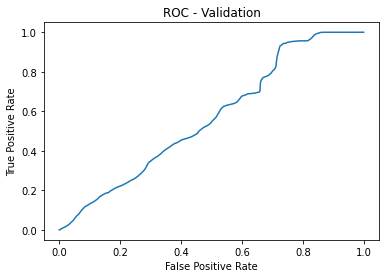

In [16]:
#ROC
probs = model.predict_proba(xvalidation)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(yvalidation, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# The ROC curve shows the model has no discrimination capacity to distinguish between positive class and negative class, we need to find a different model

# KNearest Neighbors Classifier K = 3

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [18]:
train_pred = neigh.predict(xtrain)
validation_pred = neigh.predict(xvalidation)
test_pred = neigh.predict(xtest)

In [19]:
precision, recall, fscore, support = precision_recall_fscore_support(ytrain, train_pred)
print("Training Precision: "+ (str)(precision[0]))
print("Training Recall: "+ (str)(recall[0]))
print("Training F1 score: "+ (str)(fscore[0]))

Training Precision: 0.7190938040340829
Training Recall: 0.9414009753147091
Training F1 score: 0.8153661389118445


In [20]:
precision, recall, fscore, support = precision_recall_fscore_support(yvalidation, validation_pred)
print("Validation Precision: "+ (str)(precision[0]))
print("Validation Recall: "+ (str)(recall[0]))
print("Validation F1 score: "+ (str)(fscore[0]))

Validation Precision: 0.6503645026568107
Validation Recall: 0.8359284588120017
Validation F1 score: 0.7315626332976477


In [21]:
precision, recall, fscore, support = precision_recall_fscore_support(ytest, test_pred)
print("Test Precision: "+ (str)(precision[0]))
print("Test Recall: "+ (str)(recall[0]))
print("Test F1 score: "+ (str)(fscore[0]))

Test Precision: 0.9564856809342112
Test Recall: 0.8359284588120017
Test F1 score: 0.8921527490876541


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


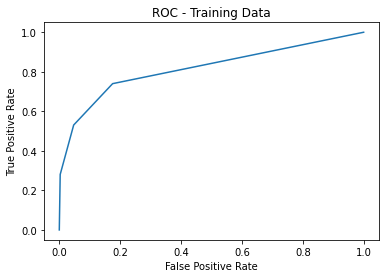

In [22]:
#ROC
probs = neigh.predict_proba(xtrain)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytrain, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

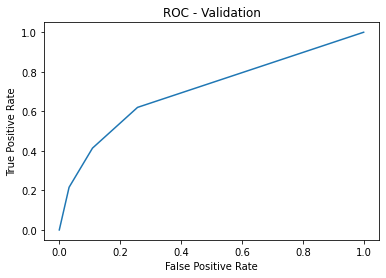

In [23]:
#ROC
probs = neigh.predict_proba(xvalidation)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(yvalidation, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# KNearest Neighbors Classifier K = 5

In [24]:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(xtrain, ytrain)

KNeighborsClassifier()

In [25]:
train_pred = neigh2.predict(xtrain)
validation_pred = neigh2.predict(xvalidation)
test_pred = neigh2.predict(xtest)

In [26]:
precision, recall, fscore, support = precision_recall_fscore_support(ytrain, train_pred)
print("Training Precision: "+ (str)(precision[0]))
print("Training Recall: "+ (str)(recall[0]))
print("Training F1 score: "+ (str)(fscore[0]))

Training Precision: 0.7197577592732778
Training Recall: 0.9201406267720107
Training F1 score: 0.8077065766725401


In [27]:
precision, recall, fscore, support = precision_recall_fscore_support(yvalidation, validation_pred)
print("Validation Precision: "+ (str)(precision[0]))
print("Validation Recall: "+ (str)(recall[0]))
print("Validation F1 score: "+ (str)(fscore[0]))

Validation Precision: 0.6614354512847084
Validation Recall: 0.8300281858248285
Validation F1 score: 0.7362030880404931


In [28]:
precision, recall, fscore, support = precision_recall_fscore_support(ytest, test_pred)
print("Test Precision: "+ (str)(precision[0]))
print("Test Recall: "+ (str)(recall[0]))
print("Test F1 score: "+ (str)(fscore[0]))

Test Precision: 0.9587350972325885
Test Recall: 0.8300281858248285
Test F1 score: 0.8897512163626099


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


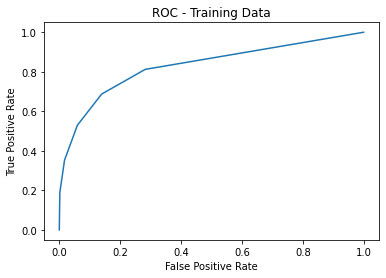

In [29]:
#ROC
probs = neigh2.predict_proba(xtrain)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytrain, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

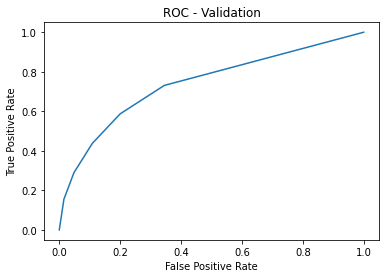

In [30]:
#ROC
probs = neigh2.predict_proba(xvalidation)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(yvalidation, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

5 Nearest Neighbors looks to produce slightly better results

# This dataset is rather imbalanced, trying to see if downsampling the dominant classes will help

In [31]:
samplesize = (int)(len(Jobtype2)/2) #job 2 has the lowest number of samples
trainingset_J0 = train[train["JobType"]==0]
new_trainingset_J0 = resample(trainingset_J0, replace = True, n_samples = samplesize, random_state=42)
trainingset_J1 = train[train["JobType"]==1]
new_trainingset_J1 = resample(trainingset_J1, replace = True, n_samples = samplesize, random_state=42)
trainingset_J2 = train[train["JobType"]==2]
new_trainingset_J2 = resample(trainingset_J2, replace = True, n_samples = samplesize, random_state=42)
trainingset_J3 = train[train["JobType"]==3]
new_trainingset_J3 = resample(trainingset_J3, replace = True, n_samples = samplesize, random_state=42)

In [32]:
new_train = new_trainingset_J0.append(new_trainingset_J1)
new_train = new_train.append(new_trainingset_J2)
new_train = new_train.append(new_trainingset_J3)

# 3NN

In [33]:
xtrain = new_train[["NrmlTaskCores", "NrmlTaskMem"]]
ytrain = new_train["JobType"]

In [34]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [35]:
train_pred = neigh3.predict(xtrain)
validation_pred = neigh3.predict(xvalidation)
test_pred = neigh3.predict(xtest)

In [36]:
precision, recall, fscore, support = precision_recall_fscore_support(ytrain, train_pred)
print("Training Precision: "+ (str)(precision[0]))
print("Training Recall: "+ (str)(recall[0]))
print("Training F1 score: "+ (str)(fscore[0]))

Training Precision: 0.6983050697717564
Training Recall: 0.8695530203852627
Training F1 score: 0.7745768400628156


In [37]:
precision, recall, fscore, support = precision_recall_fscore_support(yvalidation, validation_pred)
print("Validation Precision: "+ (str)(precision[0]))
print("Validation Recall: "+ (str)(recall[0]))
print("Validation F1 score: "+ (str)(fscore[0]))

Validation Precision: 0.7004173288835183
Validation Recall: 0.6672812574345658
Validation F1 score: 0.6834478892086197


In [38]:
precision, recall, fscore, support = precision_recall_fscore_support(ytest, test_pred)
print("Test Precision: "+ (str)(precision[0]))
print("Test Recall: "+ (str)(recall[0]))
print("Test F1 score: "+ (str)(fscore[0]))

Test Precision: 0.9649887528409463
Test Recall: 0.6672812574345658
Test F1 score: 0.7889857736187071


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


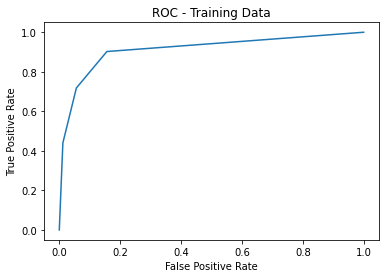

In [39]:
#ROC
probs = neigh3.predict_proba(xtrain)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytrain, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

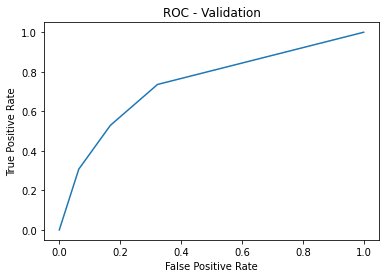

In [40]:
#ROC
probs = neigh3.predict_proba(xvalidation)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(yvalidation, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Decision Tree Classifier

In [41]:
DTC = DecisionTreeClassifier()
DTC.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [43]:
train_pred = DTC.predict(xtrain)
validation_pred = DTC.predict(xvalidation)
test_pred = DTC.predict(xtest)

In [44]:
precision, recall, fscore, support = precision_recall_fscore_support(ytrain, train_pred)
print("Training Precision: "+ (str)(precision[0]))
print("Training Recall: "+ (str)(recall[0]))
print("Training F1 score: "+ (str)(fscore[0]))

Training Precision: 0.7279415397689655
Training Recall: 0.8104104555605672
Training F1 score: 0.7669654755955356


In [45]:
precision, recall, fscore, support = precision_recall_fscore_support(yvalidation, validation_pred)
print("Validation Precision: "+ (str)(precision[0]))
print("Validation Recall: "+ (str)(recall[0]))
print("Validation F1 score: "+ (str)(fscore[0]))

Validation Precision: 0.7200525637106606
Validation Recall: 0.6197615293733392
Validation F1 score: 0.6661534319098021


In [46]:
precision, recall, fscore, support = precision_recall_fscore_support(ytest, test_pred)
print("Test Precision: "+ (str)(precision[0]))
print("Test Recall: "+ (str)(recall[0]))
print("Test F1 score: "+ (str)(fscore[0]))

Test Precision: 0.9684694051152152
Test Recall: 0.6197615293733392
Test F1 score: 0.7558347676419965


C:\Users\joshw\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


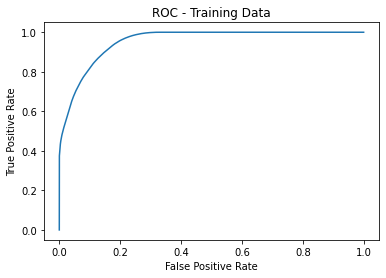

In [47]:
#ROC
probs = DTC.predict_proba(xtrain)
train_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytrain, train_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Training Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

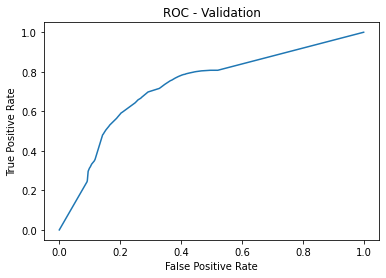

In [48]:
#ROC
probs = DTC.predict_proba(xvalidation)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(yvalidation, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

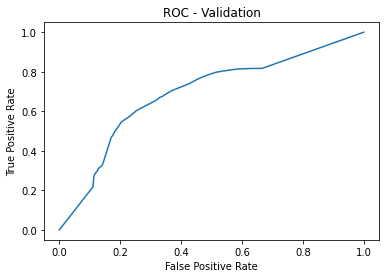

In [49]:
probs = DTC.predict_proba(xtest)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytest, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - Validation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 5NN seems to be the current most accurate predictor

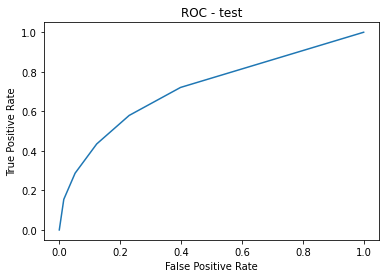

In [50]:
#ROC
probs = neigh2.predict_proba(xtest)
val_probs = probs[::,1]
pr, tpr, threshold = roc_curve(ytest, val_probs, pos_label=1)
plt.plot(pr, tpr)
plt.title("ROC - test")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()